# Лабораторная работа №3. Модуляция. Линейно частотно модулированные сигналы. Снятие с несущей частоты. Быстрая свертка  

[1. Теоретические сведения](#ch_1)  
[1.1 Модуляция сигналов](#ch_1_1)  
[1.2 Линейная частотная модуляция. ЛЧМ-сигнал. Его форма и применение](#ch_1_2)  
[1.3 ЛЧМ импульсная характеристика](#ch_1_3)  
[1.4 Сжатый ЛЧМ-сигнал](#ch_1_4)  
[1.5 Демодуляция сигналов. Снятие с несущей частоты](#ch_1_5)  
[2. Основное задание](#ch_2)  
[2.1 Формирование ЛЧМ-импульса на несущей частоте](#ch_2_1)  
[2.2 Формирование отраженного ЛЧМ-импульса с расположением от нуля](#ch_2_2)  
[2.3 Квадратурная демодуляция, снятие с несущей частоты](#ch_2_3)  
[2.4 Формирование сжатого ЛЧМ-сигнала](#ch_2_4)  
[3. Контрольные вопросы](#ch_3)  

## 1. Теоретические сведения <a id="ch_1"></a>

### 1.1 Модуляция сигналов <a id="ch_1_1"></a>

***Модуляция*** - процесс изменения одного или нескольких параметров сигнала. Модулируемый сигнал называется *несущим* (на частоте этого сигнала передается модулируемое сообщение). Информационный сигнал называется модулирующим. Как правило, модулирующий сигнал - низкочастотный, а несущий сигнал - высокочастотный. В процессе модуляции несущего сигнала спектр модулирующего сигнала переносится в область несущей частоты. Гармонические сигналы можно модулировать во времени по амплитуде, частоте 
и фазе.  
Передача электромагнитного поля в пространстве выполняется с помощью антенн, размер которых зависит от длины волны $\lambda$, низкочастотные информационные сигналы во многих случаях просто физически невозможно передать от источника к получателю (требуются антенны огромных размеров). В связи с этим применяются методы модуляции высокочастотных несущих колебаний.  

***Амплитудная модуляция*** - вид модуляции, при которой изменяемым параметром является амплитуда несущего сигнала.  
Амплитудно-модулированный (АМ) гармонический сигнал можно описать формулой

\begin{equation}
\tag{1}
s(t) = A(t)cos(2\pi f_{0}t + \phi_{0})
\end{equation}
для действительных сигналов, или
\begin{equation}
\tag{2}
s(t) = A(t)e^{j(2\pi f_{0}t+\phi_{0})}
\end{equation}
для комплексных сигналов, где $A(t)$ - закон изменения амплитуды от времени (модулирующий сигнал), $f_{0}$ - частота несущего сигнала (несущая частота, модулируемы сигнал).



Freq =  28 , Amp =  0.11249999999999998
Freq =  40 , Amp =  0.5
Freq =  52 , Amp =  0.11250000000000004
Freq differences:  12 , -12 Hz (fm = 12 Hz)


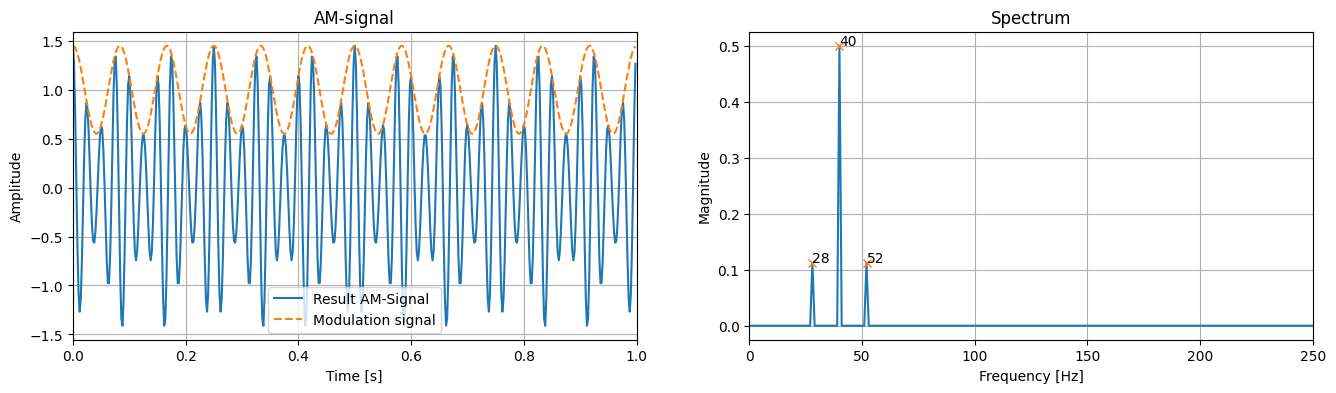

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft
from scipy.signal import find_peaks

amp = 1   # Максимальная амплитуда сигнала
km = 0.45 # Коэффициент модуляции
f0 = 40   # Несущая частота
fm = 12   # Частота модулирующего сигнала
fs = 500  # Частота дискретизации
N = 500   # Период сигнала в дискретах

T = 1/fs  # Период дискретизации
tau = N*T # Период сигнала в секундах

# Пример модулирующего сигнала
At = lambda t: amp * (1 + km * np.cos(2*np.pi*fm*t))

# Оси времени и частоты
tt = np.linspace(0, tau, N, endpoint=False)
ff = np.linspace(0, fs, N, endpoint=False)

# АМ-сигнал
s = At(tt)*np.cos(2*np.pi*f0*tt)

# Амплитудный спектр АМ-сигнала
sft = np.abs(fft(s)) / N

# Поиск пиков
ipeaks, _ = find_peaks(sft, height = 0.1)
for i in range(3):
    print("Freq = ", ipeaks[i], ", Amp = ", sft[ipeaks[i]])
print("Freq differences: ", ipeaks[1]-ipeaks[0], ",", ipeaks[1]-ipeaks[2], "Hz (fm =", fm, "Hz)")

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('AM-signal')
plt.plot(tt, s, label='Result AM-Signal')
plt.plot(tt, At(tt), '--', label='Modulation signal')
plt.xlim([0, tau])
plt.grid(True)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.plot(ff, sft)
plt.plot(ipeaks, sft[ipeaks], 'x')
for i in range(3):
    plt.annotate(ipeaks[i], (ipeaks[i], sft[ipeaks[i]]))
plt.xlim([0, fs/2]) # Ограничение оси до частоты Найквиста (только положительная область частот)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.show()

***Частотная модуляция*** - вид модуляции, при которой модулирующий сигнал управляет несущей частотой. Частотно-модулированный (ЧМ) гармонический сигнал можно описать формулой 
\begin{equation}
\tag{3}
s(t) = Acos(2\pi f_{0}t+\Phi(t))
\end{equation}
для действительных сигналов, или
\begin{equation}
\tag{4}
s(t) = Ae^{j(2\pi f_{0}t+\Phi(t))}
\end{equation}
для комплексных сигналов, где $\Phi(t)$ - закон изменения фазы от времени (модулирующий сигнал), $f_{0}$ - частота несущего сигнала (несущая частота, модулируемый сигнал). Такая модуляция является одним из видов так называемой ***угловой*** модуляции. Еще один вид угловой модуляции - ***фазовая модуляция*** (или ***фазовая манипуляция***). Эти понятия тесно связаны, так как речь идет об изменении выражения под знаком косинуса (или экспоненты для комплексных сигналов).  



Freq =  20 , Amp =  0.1764171400771328
Freq =  25 , Amp =  0.2883624153998609
Freq =  30 , Amp =  0.11194539053696478
Freq =  35 , Amp =  0.2883624038036893
Freq =  40 , Amp =  0.1764170143131837
Freq differences:  5 , -5 Hz (fm = 5 Hz)


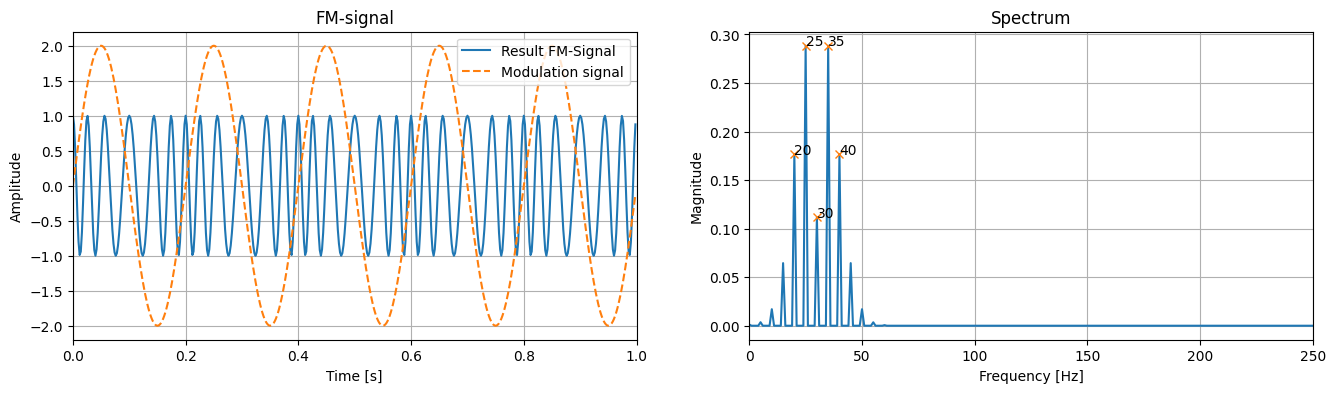

In [2]:
amp = 1   # Максимальная амплитуда сигнала
km = 10    # Коэффициент модуляции
f0 = 30   # Несущая частота
fm = 5    # Частота модулирующего сигнала
fs = 500  # Частота дискретизации
N = 500   # Период сигнала в дискретах

T = 1/fs  # Период дискретизации
tau = N*T # Период сигнала в секундах

# Пример модулирующего сигнала
Pt = lambda t: km / fm * np.sin(2*np.pi*fm*t)

# Оси времени и частоты
tt = np.linspace(0, tau, N, endpoint=False)
ff = np.linspace(0, fs, N, endpoint=False)

# FМ-сигнал
s = amp*np.cos(2*np.pi*f0*tt + Pt(tt))

# Амплитудный спектр FМ-сигнала
sft = np.abs(fft(s)) / N

# Поиск пиков
ipeaks, _ = find_peaks(sft, height = 0.07)
for i in range(5):
    print("Freq = ", ipeaks[i], ", Amp = ", sft[ipeaks[i]])
print("Freq differences: ", ipeaks[1]-ipeaks[0], ",", ipeaks[1]-ipeaks[2], "Hz (fm =", fm, "Hz)")

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('FM-signal')
plt.plot(tt, s, label='Result FM-Signal')
plt.plot(tt, Pt(tt), '--', label='Modulation signal')
plt.xlim([0, tau])
plt.grid(True)
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.plot(sft)
plt.plot(ipeaks, sft[ipeaks], 'x')
for i in range(5):
    plt.annotate(ipeaks[i], (ipeaks[i], sft[ipeaks[i]]))
plt.xlim([0, fs/2]) # Ограничение оси до частоты Найквиста (только положительная область частот)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.show()

### 1.2 Линейная частотная модуляция. ЛЧМ-сигнал. Его форма и применение <a id="ch_1_2"></a>

Сигналы с линейной частотной модуляцией (ЛЧМ) сигналы - это класс сигналов с частотной модуляцией, при которой частота несущего сигнала изменяется по линейному закону.  

В задачах радиолокации часто требуется получить заданную разрешающую способность по дальности, определяемую как минимальное расстояние между двумя целями, при которой дальность до каждой из целей определяется раздельно. Эта величина обратно пропорциональна ширине спектра сигнала. Следовательно необходимо увеличивать ширину спектра для уменьшения значения разрешающей способности.  

Увеличение ширины спектра сигнала можно достичь с помощью уменьшения длительности сигнала. Но это в свою очередь приводит к уменьшению энергии сигнала и дальности обнаружения. Компромиссное решение - использование сигналов сложной формы, в частности - ЛЧМ-сигналов.  

Функция изменения частоты линейна:  
\begin{equation}
\tag{5}
f(t) = f_{0} + kt
\end{equation}

где:  
- $f_{0} = (F_{max} + F_{min}) / 2$ - несущая (центральная) частота
- $k = (F_{max} - F_{min}) / T_{c}$ - коэффициент модуляции
- $T_{c}$ - длительность сигнала
- $F = \Delta f = 2f_{d}$ - полоса сигнала
- $f_{d}$ - девиация сигнала

Основное применение ЛЧМ-сигналов - задачи радиолокации. Широкополосные ЛЧМ сигналы позволяют обеспечить высокую разрешающую способность по дальности без уменьшения длительности посылаемых (зондируемых) импульсов.  

Основное понятие ЛЧМ сигнала - это база сигнала, которая характеризуется произведением ширины спектра и длительности импульса сигнала.  
\begin{equation}
\tag{6}
\beta = \Delta f \tau
\end{equation}

Если база ЛЧМ сигнала $\beta>>1$, то его спектр стремится к прямоугольному виду, а фазовый спектр имеет квадратичную зависимость от частоты.  

ЛЧМ-сигнал можно описать формулой (4), где $\Phi(t) = \pi \beta t^{2}$:  
\begin{equation}
\tag{7}
s(t) = Acos(2\pi f_{0}t+ \pi \beta t^{2}),
\end{equation}

где  
- $A$ - амплитуда сигнала;
- $f_{0}$ - несущая (центральная) частота сигнала;
- $\beta$ - коэффициент ЛЧМ-модуляции.



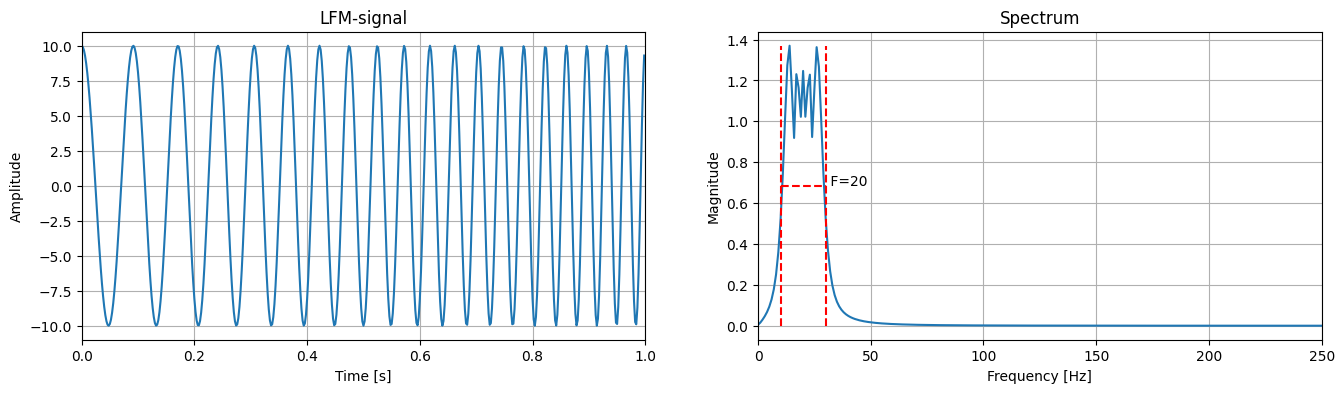

In [3]:
amp = 10  # Максимальная амплитуда сигнала
f0 = 10   # Несущая частота
F = 20    # Полоса сигнала
fs = 500  # Частота дискретизации
N = 500   # Период сигнала в дискретах

T = 1/fs  # Период дискретизации
tau = N*T # Период сигнала в секундах

# Пример модулирующего сигнала
Pt = lambda t: np.pi * F / tau * t**2

# Оси времени и частоты
tt = np.linspace(0, tau, N, endpoint=False)
ff = np.linspace(0, fs, N, endpoint=False)

# ЛЧМ-сигнал
s = amp*np.cos(2*np.pi*f0*tt + Pt(tt))

# Амплитудный спектр FМ-сигнала
sft = np.abs(fft(s)) / N

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.title('LFM-signal')
plt.plot(tt, s)
plt.xlim([0, tau])
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title('Spectrum')
plt.plot(sft)
plt.plot([f0,f0],[0, np.max(sft)], 'r--')
plt.plot([f0+F,f0+F],[0, np.max(sft)], 'r--')
plt.plot([f0,f0+F],[np.max(sft) / 2, np.max(sft) / 2], 'r--')
plt.annotate((' F=%d'%F), (f0+F, np.max(sft) / 2))
plt.xlim([0, fs/2]) # Ограничение оси до частоты Найквиста (только положительная область частот)
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.show()

### 1.3 ЛЧМ импульсная характеристика <a id="ch_1_3"></a>

***Импульсная характеристика (ИХ)*** для действительных ЛЧМ-сигналов должна быть единичной амплитуды, с нулевой начальной фазой, зеркально отображенной относительно обрабатываемого ЛЧМ-сигнала. ИХ для комплексных ЛЧМ-сигналов строится по таким же принципам, включая еще одно условие для мнимой части: мнимая часть берется с обратным знаком (комплексно сопряженная ЛЧМ-сигналу).  


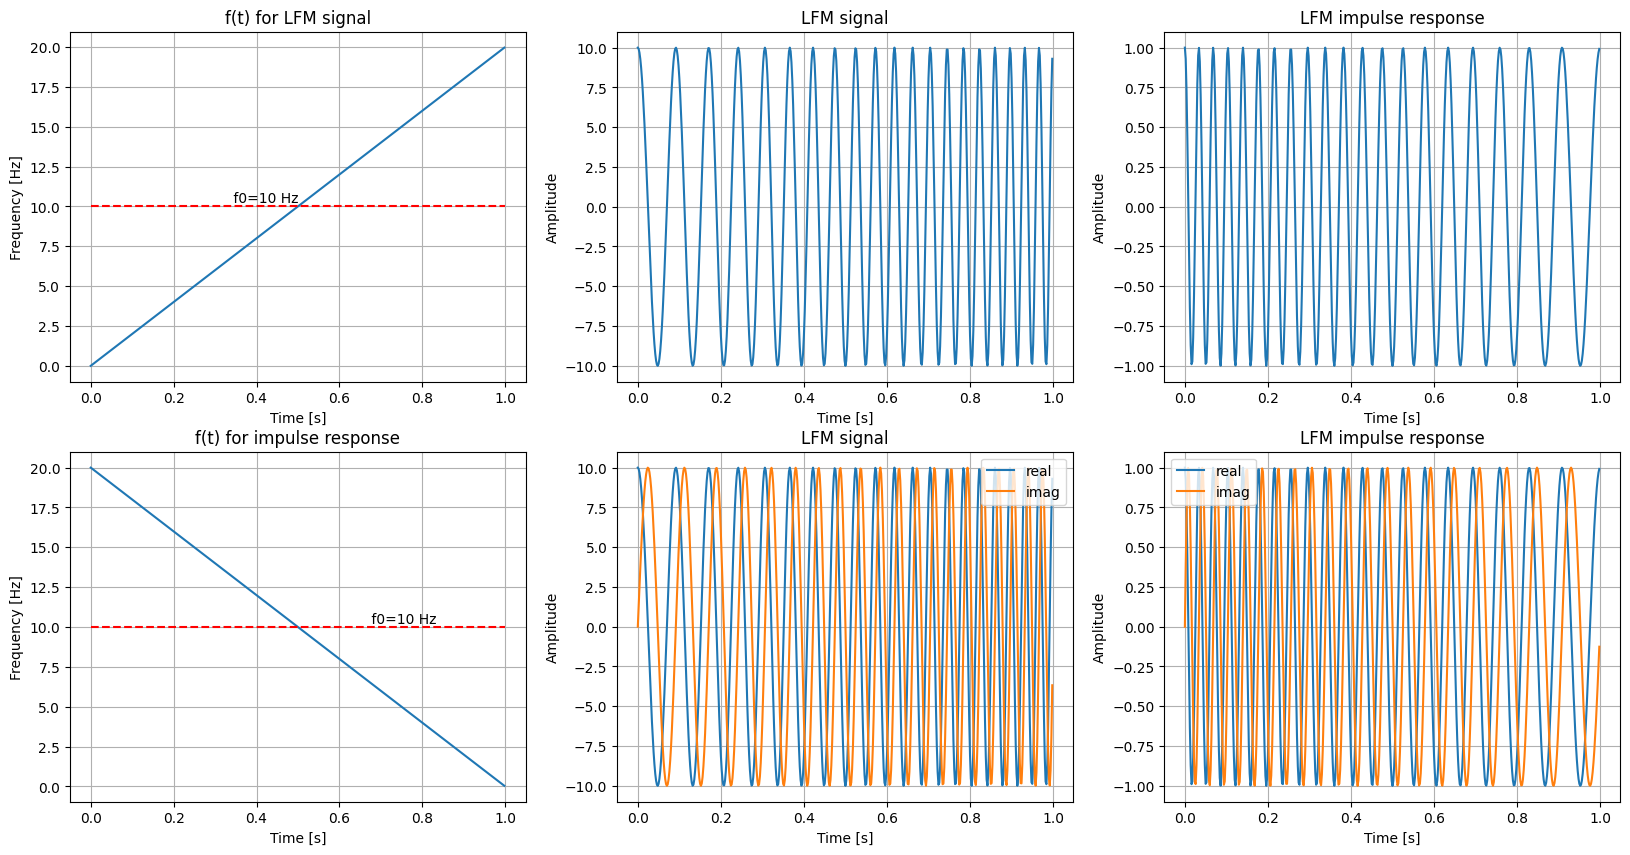

In [4]:
# Зависимости частоты от времени
ft_s = f0-F/2+F/tau*tt
tt_h = np.linspace(tau, 0, N, endpoint=False)
ft_h = f0-F/2+F/tau*tt_h

# Комплексный ЛЧМ
ss = amp*np.exp(1j*(2*np.pi*f0*tt + Pt(tt)))

# ИХ ЛЧМ-сигнала
h = np.cos(2*np.pi*f0*tt_h + Pt(tt_h))
hh = np.exp(-1j*(2*np.pi*f0*tt_h + Pt(tt_h)))

# Отображение
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('f(t) for LFM signal')
plt.plot(tt, ft_s)
plt.plot([0, tau], [f0, f0], 'r--')
plt.annotate((' f0=%d Hz'%f0), (tau/3, 1.025*f0))
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

plt.subplot(2, 3, 2)
plt.title('LFM signal')
plt.plot(tt, s)
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 3)
plt.title('LFM impulse response')
plt.plot(tt, h)
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 4)
plt.title('f(t) for impulse response')
plt.plot(tt, ft_h)
plt.plot([0, tau], [f0, f0], 'r--')
plt.annotate((' f0=%d Hz'%f0), (2*tau/3, 1.025*f0))
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')

plt.subplot(2, 3, 5)
plt.title('LFM signal')
plt.plot(tt, np.real(ss), label='real')
plt.plot(tt, np.imag(ss), label='imag')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

plt.subplot(2, 3, 6)
plt.title('LFM impulse response')
plt.plot(tt, np.real(hh), label='real')
plt.plot(tt, np.imag(hh), label='imag')
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper left')

plt.show()


### 1.4 Сжатый ЛЧМ-сигнал <a id="ch_1_4"></a>

Известно, что при прохождении через согласованный фильтр происходит сжатие ЛЧМ-сигнала. Это в свою очередь порождает узкий корреляционный пик большой амплитуды.   
***Сжатый ЛЧМ сигнал*** (или сжатый ЛЧМ импульс) представляет собой кривую, модулированную функцией $sinc(x)=sin(x)/x$, имеющую ярко выраженный пик, амплитуда которого прямо пропорциональна мощности обрабатываемого сигнала. Классическим методом получения сжатого ЛЧМ сигнала является применение ***круговой*** свертки входного сигнала с его импульсной характеристикой. Эта операция выполняется во временной области.  
***Свертка*** описывает взаимодействие сигналов между собой. Если один из сигналов - импульсная характеристика фильтра, то свертка входной последовательности с импульсной характеристикой есть ни что иное, как реакция цепи на входное воздействие. Иными словами, результирующий сигнал отражает прохождение сигнала через фильтр.  
***Линейная свертка*** двух сигналов $a(n)$ , где $n = 0, ..., N-1$ и $b(n)$,  где $n = 0, ..., M-1$ описывается формулой:  $$ s(n) = a*b = \sum_{m=0}^{n}a(m)\cdot b(n-m) \tag{8}$$  
Вычисление свертки - итеративный процесс, в котором сигналы сдвигают друг относительно друга, затем перемножают и складывают. Предполагается, что сигналы равны нулю вне заданных своих диапазонов, то есть $a(n) = 0$ при $N < n < 0$ и $b(n) = 0$ при $M < n < 0$.  

***Циклическая (круговая) свертка*** отличается от линейной тем, что входные сигналы имеют одинаковую длительность $N$. Циклическая свертка двух сигналов $a(n)$ и $b(n)$, где $n = 0, ..., N-1$ , описывается формулой: 
$$ s(n) = a*b = \sum_{m=0}^{N-1}a(m)\cdot b(n-m) \tag{9}$$ 
где $n = 0, ..., N-1$ , а число $N$ - длина сигнала $a(n)$ . Как видно, результат циклической свёртки имеет длину N.  
Из предыдущей работы, посвященной преобразованию Фурье, известно свойство: *ДПФ круговой (циклической) свертки двух периодических временных последовательностей равен произведению ДПФ этих сигналов*. Используя это правило, можно вычислить циклическую свертку в 3 этапа:  
 - перевести сигналы в частотную область, сделав их ДПФ;
 - перемножить полученные ДПФ сигналов;
 - перевести результат во временную область, сделав их ОДПФ.

Такой алгоритм называют ***быстрой сверткой***. При определенных условиях быстрая свертка может быть эффективнее классической. Ниже представлена таблица сравнения эффективности быстрой свертки и свертки, вычисляемой по прямой формуле. В таблице сравнивается число действительных умножений, требуемых для вычисления свертки. Как видно, для длин БПФ до 64, быстрая свёртка проигрывает у прямого метода. Однако, при увеличении длины БПФ результаты меняются в обратную сторону - быстрая свертка начинает выигрывать у прямого метода. Причем, чем больше длина БПФ, тем лучше выигрыш.  
| **N** | **Прямой метод** | **Быстрая свертка** | **Отношение** || --- | --- | --- | --- |
| 8   | 64  | 448    | 0.14 |
| 16  | 256 | 1088   | 0.24 |
| 32  | 1K  | 2560   | 0.4  |
| 64  | 4K  | 5888   | 0.7  |
| 128 | 16K | 13312  | 1.23 |
| ... | ... | ...    | ...  |
| 2K  | 4M  | 311296 | 13.5 |



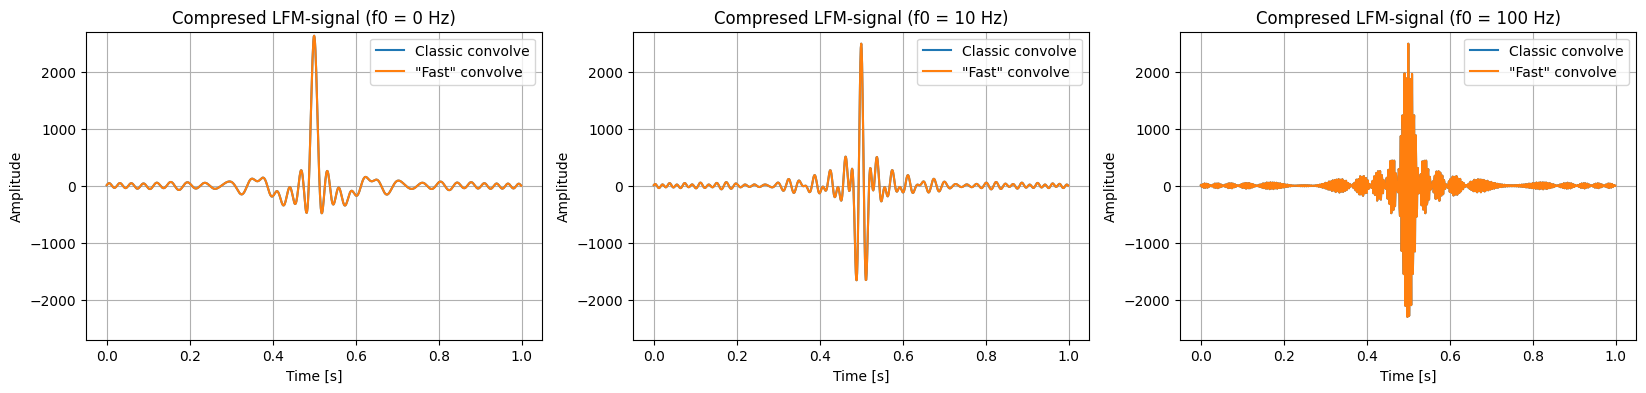

In [5]:
from scipy.fftpack import ifft

tt2 = np.linspace(0, tau, 2*N, endpoint=False)

f0s = [0, 10, 100]

plt.figure(figsize=(20, 4))

for i in range(len(f0s)):

    f0 = f0s[i]

    # ЛЧМ-сигнал и его ИХ
    s = amp*np.cos(2*np.pi*f0*tt + Pt(tt))
    h = np.cos(2*np.pi*f0*tt_h + Pt(tt_h))
    
    # Сжатие ЛЧМ методом свертки во временной области
    s_compressed1 = np.convolve(s, h)
    
    # Сжатие ЛЧМ методом быстрой свертки (в частотной области)
    spec_s = fft(s, 2*N)
    spec_h = fft(h, 2*N)
    s_compressed2 = ifft(spec_s * spec_h)
    
    # print(len(s_compressed1), len(s_compressed2), len(tt2), len(tt2[0:-2]))
    plt.subplot(1,3,i+1)
    plt.title('Compresed LFM-signal (f0 = %d Hz)'%f0)
    plt.plot(tt2[0:-1], s_compressed1, label='Classic convolve')
    plt.plot(tt2, np.real(s_compressed2), label='"Fast" convolve')
    plt.grid(True)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.ylim([-2700, 2700])
    plt.legend()

plt.show()


### 1.5 Демодуляция сигналов. Снятие с несущей частоты <a id="ch_1_5"></a>

Как было отмечено ранее, высокочастотные сигналы легче передавать и принимать из-за размеров антенн, необходимых для реализации этих процессов. С другой стороны, для спектральной цифровой обработки высокочастотных сигналов на приемнике необходимы большие аппаратные затраты. Чем больше несущая частота, тем большая частота дискретизации нужна для получения качественных спектральных характеристик сигналов. А следовательно, необходимо больше памяти и больше вычислительных операций для перевода сигнала из временной области в частотную (БПФ).  
***Демодуляция*** - процесс, обратный модуляции, который заключается в выделении модулирующего сигнала из модулированного колебания несущей частоты. Модулирующий сигнал, как правило, низкочастотный. Его обработать, как во временной, так и в частотной области уже гораздо проще с точки зрения плотности вычислений.  
В лабораторной работе мы познакомимся с таким видом демодуляции, как ***квадратурная демодуляция***. Ее суть заключается в выделении из входного сигнала комплексных спектральльных компонент путем перемножения входного сигнала с ортогональными гармоническими сигналами (несущей частоты) и последующей низкочастотной фильтрацией. Квадратурная демодуляция является универсальным методом извлечения информации из амплитудно-, частотно- и фазо-модулированных сигналов.   

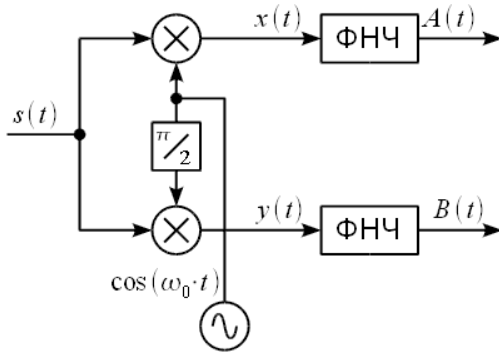  
*Рисунок 1 - Структурная схема квадратурного демодулятора*  

***Снятие с несущей частоты*** - это демодуляция частотно модулированного колебания с последующей низкочастотной фильтрацией, в результате которого спектр частот из окрестности несущей частоты переходит в окрестность нулевой частоты. В основе данной операции лежат тригонометрические тождества:  
$$2cos\alpha cos\beta = cos(\alpha + \beta) + cos(\alpha - \beta) \tag{10},$$ или
$$2cos\alpha sin\beta = sin(\alpha + \beta) - sin(\alpha - \beta) \tag{11}.$$
Высокочастотная составляющая $(\alpha + \beta)$ "вырезается" фильтром низких частот (ФНЧ).  

Ниже приведен простой пример, иллюстрирующий процесс снятия с несущей частоты. Воспользуемся формулой (3), описывающей частотную модуляцию действительного сигнала. Пусть модулирующий сигнал описывается простой линейной функцией: $\Phi(t) = 2\pi f_{m}t$. Тогда модулированный сигнал будет описан выражением: $s(t) = Acos(2\pi (f_{0}+f_{m})t)$. Обратите внимание, что амплитуда итогового демодулированного сигнала, прошедшего через ФНЧ, вдвое меньше амплитуды исходного сигнала, что соответствует формуле (10).


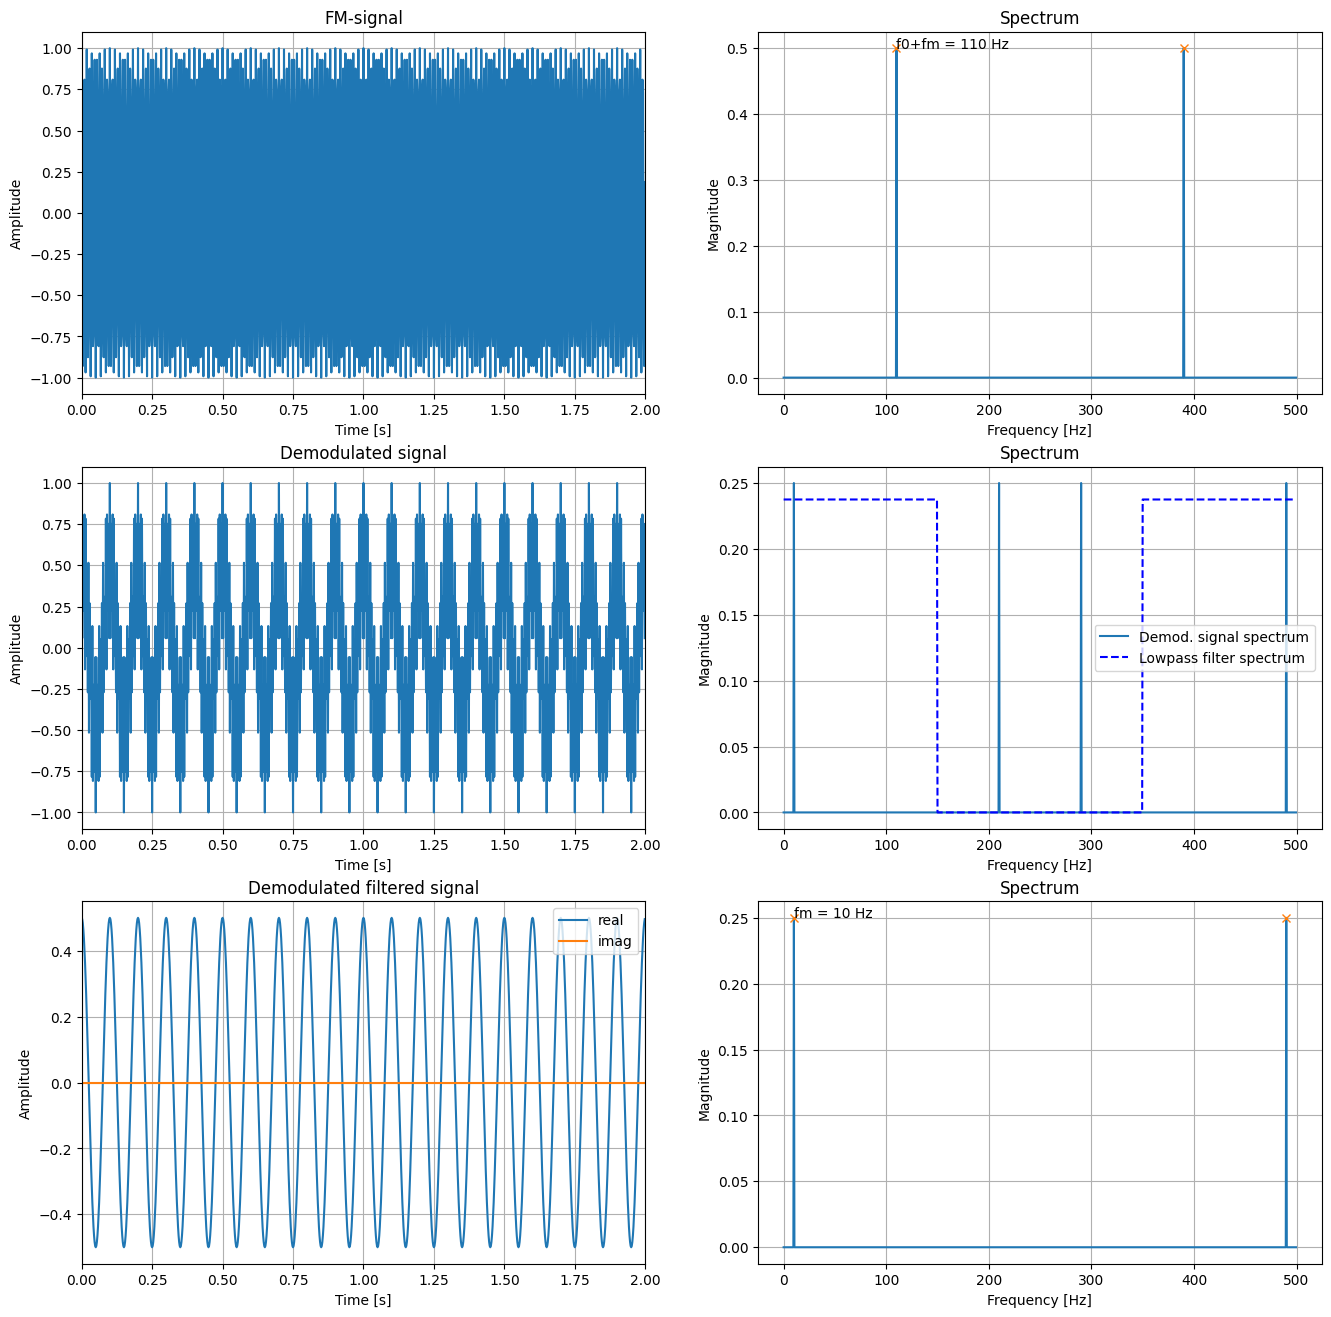

In [6]:
# Параметры сигнала
amp = 1
fs = 500 # Частота дискретизации, Гц
f0 = 100 # Несущая частота, Гц
fm = 10  # Частота модуляции, Гц
N = 1000 # Отсчетов в периоде сигнала

T = 1/fs  # Период дискретизации
tau = N*T # Период сигнала в секундах

# Модулирующий сигнал
Pt = lambda t: 2*np.pi*fm*t

# Оси времени и частоты
tt = np.linspace(0, tau, N, endpoint=False)
ff = np.linspace(0, fs, N, endpoint=False)

# FМ-сигнал
s = amp*np.cos(2*np.pi*f0*tt + Pt(tt))

# Амплитудный спектр FМ-сигнала
sft = np.abs(fft(s)) / N

# Поиск пиков
ipeaks, _ = find_peaks(sft, height = 0.07)

plt.figure(figsize=(16, 16))

plt.subplot(3, 2, 1)
plt.title('FM-signal')
plt.plot(tt, s)
plt.xlim([0, tau])
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.title('Spectrum')
plt.plot(ff, sft)
plt.plot(ff[ipeaks], sft[ipeaks], 'x')
plt.annotate(('f0+fm = %d Hz'%ff[ipeaks[0]]), (ff[ipeaks[0]], sft[ipeaks[0]]))
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Снятие с несущей частоты
s_demod = s * np.cos(2*np.pi*f0*tt)

# Идеальный ФНЧ в часотной области
lowpass = np.ones(N)
fc = 150 # Частота среза
Nc = int(np.round(fc*N/fs))
lowpass[Nc:N-Nc] = 0

# Спектры сигнала до фильтра и после
spec = fft(s_demod)
spec_lowpass = spec * lowpass
aspec = np.abs(spec) / N
aspec_lowpass = np.abs(spec_lowpass) / N
s_demod_lowpass = ifft(spec_lowpass)

# Поиск пиков
ipeaks, _ = find_peaks(aspec_lowpass, height = 0.07)

plt.subplot(3, 2, 3)
plt.title('Demodulated signal')
plt.plot(tt, s_demod)
plt.xlim([0, tau])
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 4)
plt.title('Spectrum')
plt.plot(ff, aspec, label='Demod. signal spectrum')
plt.plot(ff, lowpass*np.max(aspec)*0.95, 'b--', label='Lowpass filter spectrum')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(3, 2, 5)
plt.title('Demodulated filtered signal')
plt.plot(tt, np.real(s_demod_lowpass), label='real')
plt.plot(tt, np.imag(s_demod_lowpass), label='imag')
plt.xlim([0, tau])
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 2, 6)
plt.title('Spectrum')
plt.plot(ff, aspec_lowpass)
plt.plot(ff[ipeaks], aspec_lowpass[ipeaks], 'x')
plt.annotate(('fm = %d Hz'%ff[ipeaks[0]]), (ff[ipeaks[0]], aspec_lowpass[ipeaks[0]]))
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.show()


## 2. Основное задание <a id="ch_2"></a>

В рамках задания к данной лабораторной работе необходимо промоделировать несколько важных этапов синтеза и обработки ЛЧМ-сигналов. Представим, что мы разрабатываем радилокационную станцию (РЛС), назначением которой является обнаружение объектов в некоторой ограниченной области видимости. РЛС излучает зондирующий ЛЧМ-импульс на несущей частоте $f_{0}$, принимает отраженный сигнал. Обработав отраженный ЛЧМ-сигнал, РЛС делает вывод о параметрах объекта отражения (например, о дальности до него). В рамках этой задачи нам предстоит сделать следующие шаги: 
- Сформировать зондирующий ЛЧМ-импульс на несущей частоте $f_{0}$ с единичной амплитудой таким образом, чтобы середина импульса соответствовала нулевому отсчету по времени (в лекции $S_{pass}$ "по центру").  
- Сформировать отраженный сигнал с задержкой в 1/2 длительности импульса (в лекциях $S_{pass}$ "от нуля") и амплитудой <1 (имитация потерь в мощности при распространении сигнала).
- Снять отраженный сигнал с несущей частоты, применить ФНЧ.
- Сформировать сжатый ЛЧМ-сигнал, воспользовавшись алгоритмом быстрой свертки.
- Определить параметры сжатого ЛЧМ-сигнала. В частности, по положению пика сжатого ЛЧМ-сигнала можно определить задержку отраженного сигнала относительно исходного сигнала, из чего можно сделать вывод о дальности объекта отражения.

#### Исходные данные для выполнения задания  

$N_{список}$ - номер по списку;  
- частота дискретизации: $f_{s} = 800 + 2 \cdot N_{список}$, Гц;  
- центральная (несущая) частота: $f_{0} = 180 + N_{список}$, Гц;  
- полоса ЛЧМ-сигнала (2 девиации): $\Delta f = 25 + N_{список}$, Гц;  
- период сигнала в дискретах: $N = 1024$;  
- длительность ЛЧМ-импульса в дискретах: $N_{i} = 400 + N_{список}$;  
- амплитуда отраженного ЛЧМ-сигнала: $А = N_{список} / 30$, В;  
- начальная фаза отраженного ЛЧМ-сигнала: $\phi_{0} = 2 \pi / N_{список}$, рад.  

### 2.1 Формирование ЛЧМ-импульса на несущей частоте <a id="ch_2_1"></a>

1. Сформировать ЛЧМ-импульс с центральным расположением, воспользовавшись формулой из лекций

$$
s(n) = cos\left( \pi (an^{2}+bn) \right),
$$
где $a=\Delta fT/N_{i}$; $b=2f_{0}T$; $N_{i}$ - длительность импульса в отсчетах; $n$ - последовательность из номеров отсчетов $[-[N{i}/2], ... , -1, 0, 1, ... , [N_{i}/2]]$.  

2. Проверить правильность формы ЛЧМ-сигнала по его спектральным характеристикам: высота спектра должна совпасть со значением, вычисленным по формуле $$
A_{s}=\frac{A}{2} \sqrt{\frac{N_{i}}{\Delta fT}},
$$
ширина спектра (на половине высоты) должна соответстовать полосе $\Delta f$, а центральное расположение - несущей частоте $f_{0}$. Фазовый спектр в окрестности центральной частоты должен иметь квадратичный характер (быть похожим на параболу).
Ниже будут приведены рисунки с примерами. Исходные данные для приведенных примеров следующие:

```python
fs = 25e3      # Частота дискретизации, Гц
f0 = 3000      # Несущая частота, Гц
df = 1200      # Полоса ЛЧМ-сигнала, Гц
N = 8192       # Количество дискретов (период сигнала в дискретах)
Ni = 1001      # Длительность ЛЧМ-импульса
A = 0.3        # Амплитуда отраженного сигнала, В
phi0 = np.pi/4 # Начальная фаза отраженного ЛЧМ-сигнала, рад
```
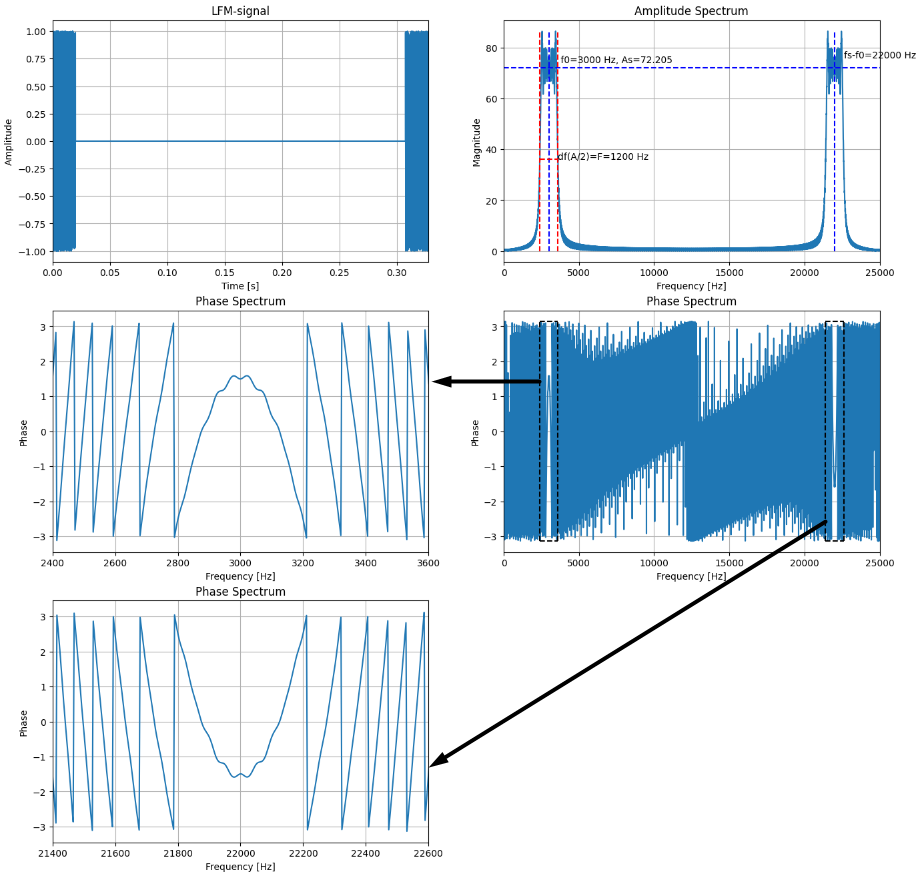  
*Рисунок 2 - Пример формирования ЛЧМ-импульса с центральным расположением. Сигнал во временной области, его амплитудный и фазовый спектры*  

### 2.2 Формирование отраженного ЛЧМ-импульса с расположением от нуля <a id="ch_2_2"></a>

1. Сформировать ЛЧМ-импульс с центральным расположением, воспользовавшись формулой из лекций

$$
s_{отр.}(n) = Acos\left( \pi (an^{2}+bn+c) \right),
$$
где $A$ - амплитуда отраженного ЛЧМ-сигнала, $a=\Delta fT/N_{i}$; $b=2f_{0}T-\Delta fT$; $c=\phi_{0} / \pi$; $\phi_{0}$ - начальная фаза отраженного ЛЧМ-сигнала; $N_{i}$ - длительность импульса в отсчетах; $n$ - последовательность из номеров отсчетов $[0, 1, ... , N_{i}-1]$.  

2. Проверить правильность формы ЛЧМ-сигнала по его спектральным характеристикам (как это было сделано в п. 3.1). У амплитудного спектра должна измениться только высота (так как изменилась амплитуда исходного сигнала). Фазовый спектр в окрестности центральной частоты близок к линейному с резким наклоном (ветвь параболы).

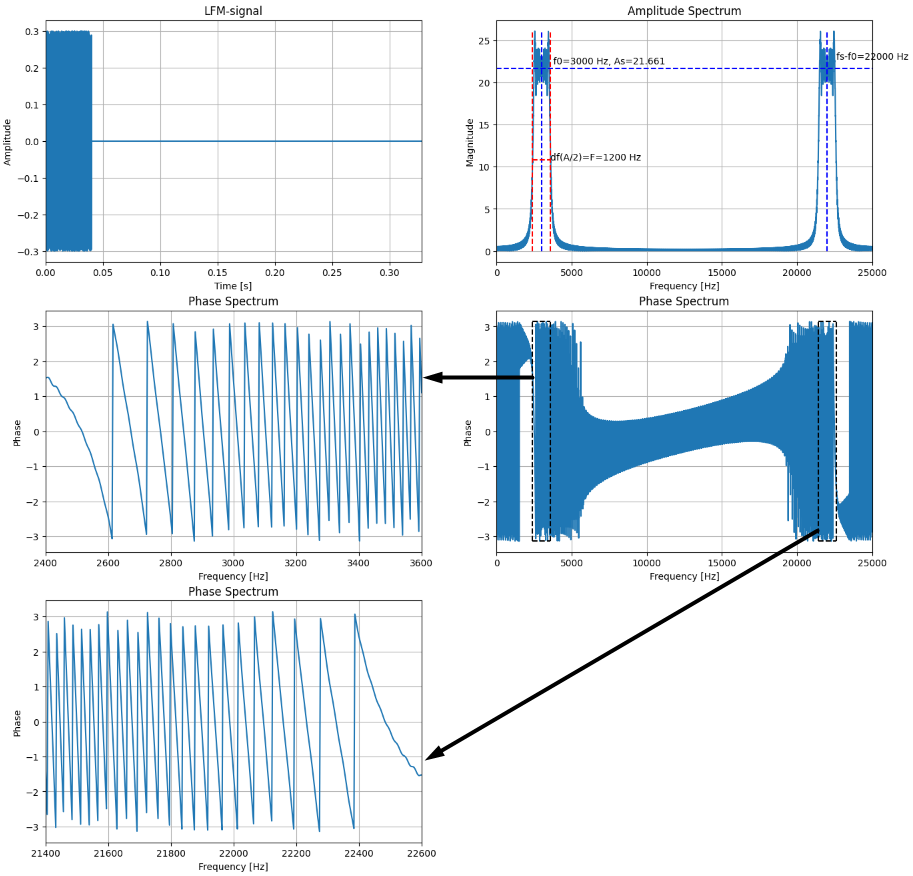  
*Рисунок 3 - Пример формирования отраженного ЛЧМ-импульса. Сигнал во временной области, его амплитудный и фазовый спектры*  

### 2.3 Квадратурная демодуляция, снятие с несущей частоты <a id="ch_2_3"></a>

1. Выполнить квадратурную демодуляцию, домножив отраженный сигнал (полученный в п.3.2) на комплексный гармонический сигнал частотой $f_{0}$:

$$
s_{демод.}(n) = s_{отр.}(n) \cdot e^{-j(2\pi f_{0}nT)},
$$
где $n$ - последовательность из номеров отсчетов $[0, 1, ... , N-1]$.  
В результате получится сигнал, для которого одна спектральная составляющая ушла в окрестность 0, а другая - в область высоких частот, которая необходимо отфильтровать при помощи фильтра низких частот (ФНЧ).  

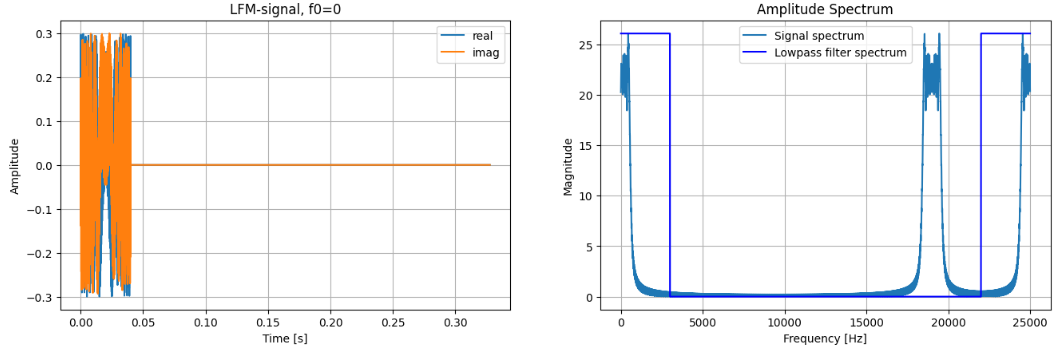  
*Рисунок 4 - Сигнал, снятый с несущей методом квадратурной демодуляции, и его амплитудный спектр*  

2. Спроектировать идеальный ФНЧ в частотной области (см. рисунок 4), задав необходимую ***частоту среза*** $f_{c}$ (необходимо выбрать значение самостоятельно, исходя из получившихся частотных характеристик сигнала).

*ПРИМЕЧАНИЕ*. В данном задании ограничимся идеальным ФНЧ. На практике идеальных частотных характеристик фильтра добиться сложно. Проектированию цифровых фильтров будет посвящена одна из следующих лабораторных работ.  

```python
# Пример реализации идеального ФНЧ в частотной области
lowpass = np.ones(N)
Nc = int(np.round(fc*N/fs))
lowpass[Nc:N-Nc] = 0
```

3. Применить ФНЧ к сигналу в частотной области. Построить получившийся спектр и сигнал во временной области. Для перевода сигнала из частотной области во временную, можно воспользоваться функцией *ifft* из пакета *scipy.fftpack*.

```python
spec = fft(s)                    # спектр сигнала до применения ФНЧ
spec_filtered = spec * lowpass   # спектр сигнала после применения ФНЧ
s_filtered = ifft(spec_filtered) # сигнал во временной области после применения ФНЧ
```

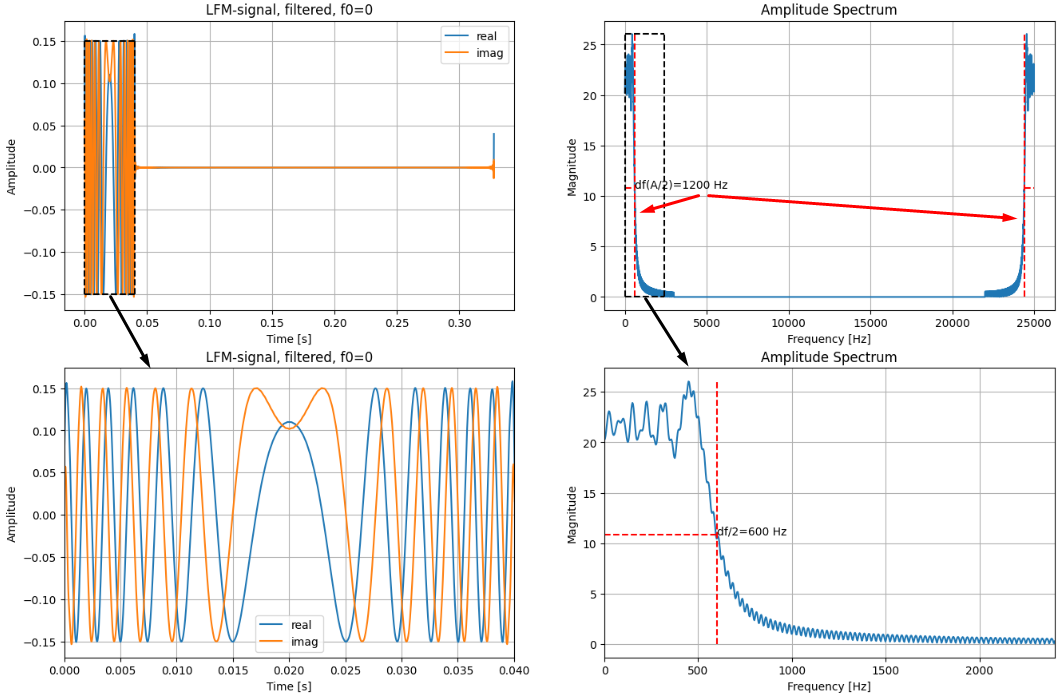  
*Рисунок 5 - Сигнал во временной области и его спектр после применения ФНЧ*  

### 2.4 Формирование сжатого ЛЧМ-сигнала <a id="ch_2_4"></a>

1. Сформировать импульсную характеристику (ИХ, опорный сигнал). ИХ должна быть комплексно сопряженная исходному сигналу с центральным расположением. И так как мы работаем в области низких частот (после снятия с несущей), для ИХ $f_{0}=0$ (в лекциях $S_{base}$ "по центру"), соответственно, коэффициент $b=0$. Начальная фаза опорного сигнала также равна 0, а амплитуда равна 1. Таким образом, для комплексную ИХ можно сформировать по формуле:

$$
h(n) = e^{-j\pi \cdot an^{2} }
$$
где $a=\Delta fT/N_{i}$; $N_{i}$ - длительность импульса в отсчетах; $n$ - последовательность из номеров отсчетов $[-[N{i}/2], ... , -1, 0, 1, ... , [N_{i}/2]]$.  

2. Проверить правильность формы ЛЧМ-сигнала по его спектральным характеристикам: высота спектра должна совпасть со значением, вычисленным по формуле $$
A_{h}=A\sqrt{\frac{N_{i}}{\Delta fT}},
$$
ширина спектра (на половине высоты) должна соответстовать полосе $\Delta f$, а центральное расположение - точке 0 на оси частот. Фазовый спектр в окрестности центральной частоты должен по-прежнему, иметь квадратичный характер (быть похожим на параболу).

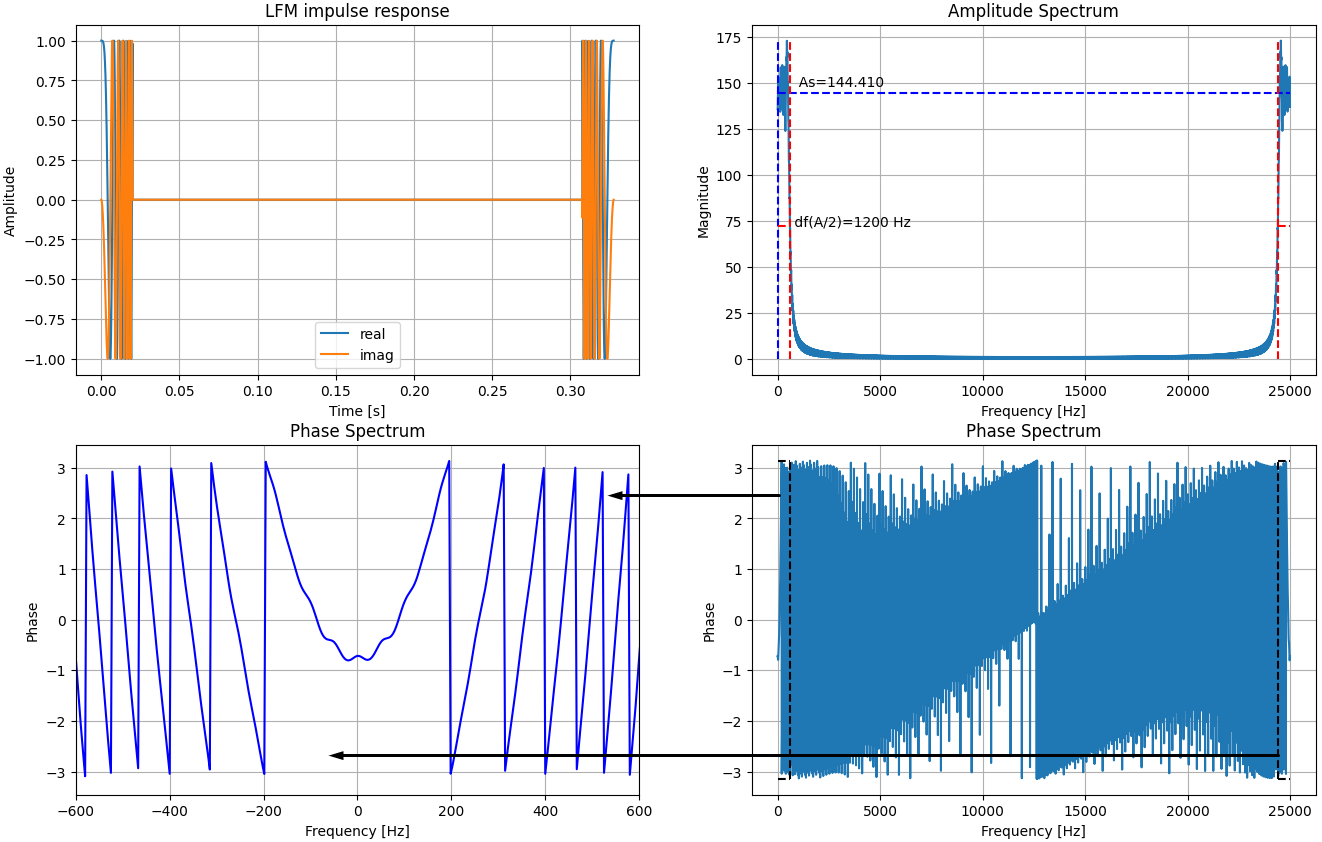  
*Рисунок 6 - Пример формирования ИХ ЛЧМ-сигнала с центральным расположением. Сигнал во временной области, его амплитудный и фазовый спектры*  

3. Сформировать сжатый ЛЧМ-сигнал, воспользовавшись алгоритмом быстрой свертки. Для этого достаточно в частотной области перемножить спектры сигнала, полученного на этапе 3.3 и импульсной характеристики, после чего выполнить ОБПФ.  

```python
spec_h = fft(h)
s_compgessed = ifft(spec_filtered * spec_h)
```

4. Проанализировать параметры сжатого ЛЧМ-сигнала

- положение на оси времени должно соответствовать задержке отраженного сигнала относительно излучаемого ($N_{i}$ в дискретах, $N_{i}T$ в секундах);
- амплитуда сжатого сигнала должна быть прямо пропорциональна полосе (девиации) и амплитуде отраженного сигнала; вычисляется по формуле: $A_{max}=A_{s}A_{h}\Delta fT$, где $A_{s}$ и $A_{h}$ - высоты спектров отраженного сигнала и импульсной характеристики соответственно;
- ширина сжатого импульса (ширина главного пика между точками пересечания с осью ОХ) опратнопропорциональна девиации: $\Delta t = 1/f_{д} = 1 / (0.5\Delta f)$;
- фаза сжатого сигнала должна быть равна начальной фазе отраженного ЛЧМ-сигнала $\phi_{0}$.

Фазу следует рассчитать, воспользовавшись функцией *np.arctan2*:  

```python
abs_s_compressed = np.abs(s_compgessed) # Модуль сжатого сигнала
i_max = np.argmax(abs_s_compressed)     # Положение максимума сжатого сигнала
phi = np.arctan2(np.imag(s_compgessed), np.real(s_compgessed)) # фаза сжатого сигнала
```

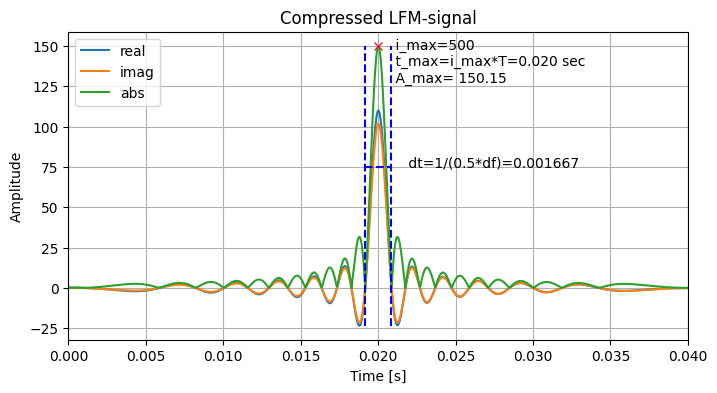  
*Рисунок 7* - Сжатый ЛЧМ-сигнал  




## 3. Контрольные вопросы <a id="ch_3"></a>

1. Что такое модуляция? Что такое амплитудная модуляция, угловая модуляция, чатотная модуляция?
2. Что такое несущая частота?
3. Какие сигналы называют линейно частотно модулированными? В чем их преимущество относительно простых гармонических сигналов?
4. Что такое база, девиация, полоса ЛЧМ-сигнала?
5. Каким образом формируется импульсная характеристика для действительных и комплексных ЛЧМ-сигналов?
6. Как получить сжатый ЛЧМ-сигнал? Назовите несколько способов.
7. Что такое свертка, линейная свертка, быстрая свертка?
8. Как по амплитудному спектру определить полосу ЛЧМ сигнала?
9. Как по амплитудному спектру определить центральную (несущую) частоту ЛЧМ-сигнала?
10. Какой характер имеет фазовый спектр ЛЧМ-сигнала?
11. Как определить начальную фазу отраженного ЛЧМ-сигнала?
12. Как по форме сжатого ЛЧМ-сигнала определить девиацию?
13. Как определить время задержки отраженного ЛЧМ-сигнала относительно зондирующего (излучаемого)?
14. Что такое снятие сигнала с несущей частоты? На каких принципах основан этот процесс, из каких эпапов состоит?
15. Что такое квадратурная демодуляция?
